In [2]:
import csv
import re

In [4]:
imgFieldSetLens = {}
examples = []
with open('tcdat.csv', 'r') as tcdatCSV:
    reader = csv.reader(tcdatCSV)
    for row in reader:
        img = row[6].split('.')
        if len(img) in imgFieldSetLens:
            imgFieldSetLens[len(img)] += 1
        else:
            imgFieldSetLens[len(img)] = 1
            examples.append(img)

In [36]:
extensions = {}
extExamples = []
with open('tcdat.csv', 'r') as tcdatCSV:
    reader = csv.reader(tcdatCSV)
    for row in reader:
        img = row[6].split('.')
        if img[-1] in extensions:
            extensions[img[-1]] += 1
        else:
            extensions[img[-1]] = 1
            extExamples.append(img)
            

In [20]:
count0 = 0
badDate = []
with open('tcdat.csv', 'r') as tcdatCSV:
    reader = csv.reader(tcdatCSV)
    for row in reader:
        img = row[6].split('.')
        if not re.findall('[\d]{8}$',img[0]):
            badDate.append(img)
            count0 += 1
            

In [31]:
withSeconds = 0
withoutSeconds = 0
total = 0
with open('tcdat.csv', 'r') as tcdatCSV:
    reader = csv.reader(tcdatCSV)
    for row in reader:
        img = row[6].split('.')
        if re.findall('[\d]{8}$',img[0]):
            if re.fullmatch('[\d]{4}$',img[1]):
                withoutSeconds += 1
            if re.fullmatch('[\d]{6}$',img[1]):
                withSeconds += 1
            total += 1
print(withSeconds)
print(withoutSeconds)
print(total)
print(total - withoutSeconds - withSeconds)

190432
9362942
9553449
75


In [5]:
count1 = 0
with open('tcdat.csv', 'r') as tcdatCSV:
    reader = csv.reader(tcdatCSV)
    for row in reader:
        img = row[6].split('.')
        if re.fullmatch('\d\d\d\d\d\d\d\d',img[0]) and not re.fullmatch('\d\d\d\d',img[1]):
            #print(img)
            count1 += 1

In [6]:
count2 = 0
with open('tcdat.csv', 'r') as tcdatCSV:
    reader = csv.reader(tcdatCSV)
    for row in reader:
        img = row[6].split('.')
        if re.match('\d\d\d\d\d\d\d\d',img[0]) and not re.fullmatch('\d\d\d\d\d\d\d\d',img[0]):
            #print(img)
            count2 += 1
            

In [12]:
satellites = {}
satExamples = []
with open('tcdat.csv', 'r') as tcdatCSV:
    reader = csv.reader(tcdatCSV)
    for row in reader:
        img = row[6].split('.')
        if img[2] in satellites:
            satellites[img[2]] += 1
        else:
            satellites[img[2]] = 1
            satExamples.append(row)
            

In [32]:
stormTypes = {}
stormTypesExamples = []
with open('tcdat.csv', 'r') as tcdatCSV:
    reader = csv.reader(tcdatCSV)
    for row in reader:
        if row[3] in stormTypes:
            stormTypes[row[3]] += 1
        else:
            stormTypes[row[3]] = 1
            stormTypesExamples.append(row)

In [33]:
a = 0
with open('tcdat.csv', 'r') as tcdatCSV:
    reader = csv.reader(tcdatCSV)
    for row in reader:
        if not re.fullmatch('[\d]{2}', row[2]):
            a += 1
print(a)

0


In [8]:
basinSet = {}
with open('tcdat.csv', 'r') as tcdatCSV:
    reader = csv.reader(tcdatCSV)
    for row in reader:
        if row[1] in basinSet:
            basinSet[row[1]] += 1
        else:
            basinSet[row[1]] = 1

In [9]:
seasonSet = {}
with open('tcdat.csv', 'r') as tcdatCSV:
    reader = csv.reader(tcdatCSV)
    for row in reader:
        if row[0][2] == '9':
            row[0] = int('19' + row[0][2:])
        else:
            row[0] = int('20' + row[0][2:])
        if row[0] in seasonSet:
            if row[1] in seasonSet[row[0]]:
                seasonSet[row[0]][row[1]] += 1
            else:
                seasonSet[row[0]][row[1]] = 1
        else:
            seasonSet[row[0]] = {row[1]: 1}
       

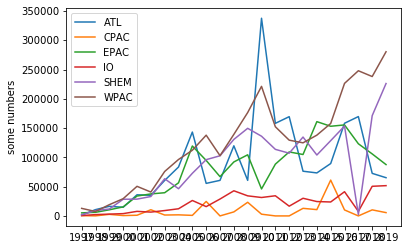

In [10]:
import matplotlib.pyplot as plt
basinList = list(basinSet.keys())
basinList.sort()
seasonList = list(seasonSet.keys())
seasonList.sort()
pltList = []
for i in range(len(basinList)):
    pltList.append([])
    for j in range(len(seasonList)):
        if basinList[i] in seasonSet[seasonList[j]]:
            pltList[i].append(seasonSet[seasonList[j]][basinList[i]])
        else:
            pltList[i].append(0)
for i in range(len(pltList)):
    plt.plot(pltList[i], label=basinList[i])
plt.xticks(range(len(seasonList)),seasonList)
plt.ylabel('some numbers')
plt.legend()
plt.show()
